In [102]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [21]:
df = pd.read_csv("FinalDomesticDataset.csv",low_memory=True)

In [22]:
df.head(5)

,InvoiceDate,AvgNetFare,TotalNetFare
0,2018-01-04,4276.300000,85526.0
1,2018-01-05,4235.000000,118580.0
2,2018-01-06,4323.838710,268078.0
3,2018-01-07,3392.442308,176407.0
4,2018-01-08,4050.176030,1081397.0


In [23]:
df.shape

(701, 3)

In [24]:
df.columns

Index(['InvoiceDate', 'AvgNetFare', 'TotalNetFare'], dtype='object')

In [30]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AvgNetFare,701.0,3930.259378,416.697758,2016.0,3634.289003,3899.057554,4206.110553,5.253862e+03
TotalNetFare,701.0,561127.221027,673795.210814,0.0,0.000000,271215.000000,964944.000000,2.774811e+06


In [25]:
df.dtypes

InvoiceDate      object
AvgNetFare      float64
TotalNetFare    float64
dtype: object

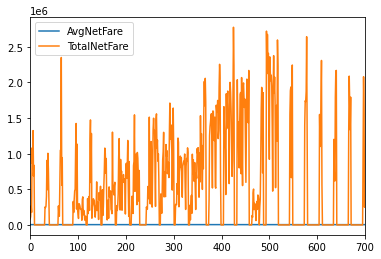

In [26]:
df.plot()

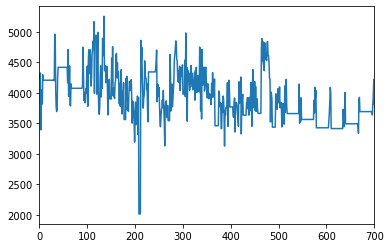

In [57]:
df.AvgNetFare.plot()   

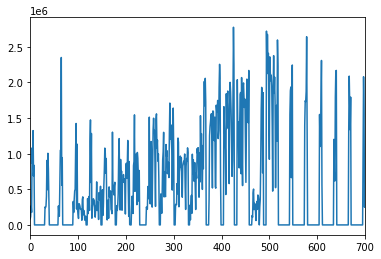

In [13]:
df.TotalNetFare.plot()

# Quick Check for Autocorrelation

Lets findout all possible methods to find Autocorrelation.

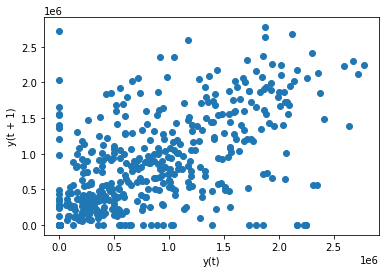

In [118]:
#Using Scatter plot
from pandas.plotting import lag_plot
series = pd.read_csv('FinalDomesticDataset.csv', header=0, index_col=0)
lag_plot(series)
pyplot.show()

In [25]:
df.corr()

,AvgNetFare,TotalNetFare
AvgNetFare,1.000000,0.012331
TotalNetFare,0.012331,1.000000


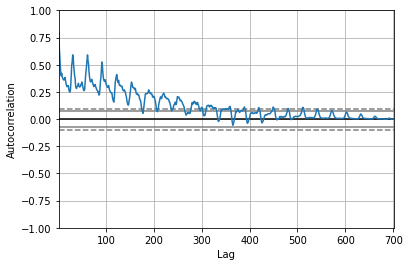

In [48]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

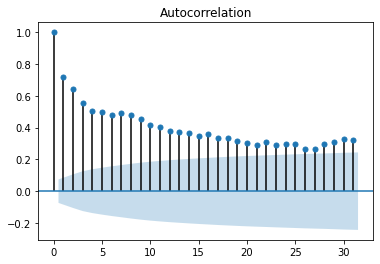

In [119]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series.AvgNetFare,lags=31)
pyplot.show()

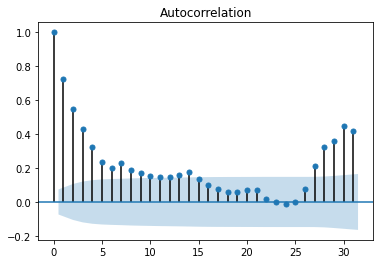

In [53]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series.TotalNetFare,lags=31)
pyplot.show()

In [ ]:
#Converting datatype of "InvoiceDate" to DateTime.
#df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [81]:
data=df.drop(['TotalNetFare'], axis = 1) 

In [82]:
data.head(3)

,InvoiceDate,AvgNetFare
0,2018-01-04,4276.30000
1,2018-01-05,4235.00000
2,2018-01-06,4323.83871


In [58]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [87]:
#to ensure am not fooling myself with more sophisticated methods.
#Its an Naive Approach.
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt
# prepare data
X = series.values
train, test = X[0:-24], X[-24:]
persistence_values = range(1, 25)
scores = list()
for p in persistence_values:
    # walk-forward validation
    history = [x for x in train]
    predictions = list()
    for i in range(len(test)):
        # make prediction
        yhat = history[-p]
        predictions.append(yhat)
        # observation
        history.append(test[i])
        
    # report performance    
    rmse = sqrt(mean_squared_error(test, predictions))
    scores.append(rmse)
    print('p=%d RMSE:%.3f' % (p, rmse))

p=1 RMSE:308861.064
p=2 RMSE:442386.898
p=3 RMSE:447891.626
p=4 RMSE:402513.270
p=5 RMSE:422966.473
p=6 RMSE:422966.473
p=7 RMSE:495944.810
p=8 RMSE:532035.579
p=9 RMSE:584706.602
p=10 RMSE:657857.284
p=11 RMSE:686545.056
p=12 RMSE:686545.057
p=13 RMSE:686545.058
p=14 RMSE:686545.058
p=15 RMSE:686545.059
p=16 RMSE:686545.059
p=17 RMSE:686545.060
p=18 RMSE:686545.061
p=19 RMSE:686545.061
p=20 RMSE:686545.062
p=21 RMSE:686545.063
p=22 RMSE:686545.063
p=23 RMSE:686545.064
p=24 RMSE:686545.064


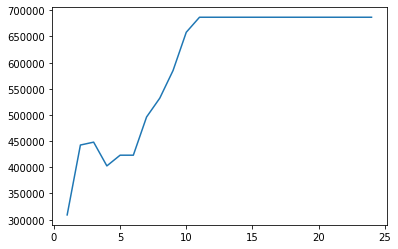

In [88]:
# plot scores over persistence values
pyplot.plot(persistence_values, scores)
pyplot.show()

From above model we understand that simple naive approach is not enough

In [ ]:
#Lets start modelling

In [30]:
data.head(5)

,InvoiceDate,AvgNetFare
0,2018-01-04,4276.300000
1,2018-01-05,4235.000000
2,2018-01-06,4323.838710
3,2018-01-07,3392.442308
4,2018-01-08,4050.176030


In [98]:
#Converting "AvgNetFare" from Float to Int.
data["AvgNetFare"] = data["AvgNetFare"].astype(int)

In [60]:
data.head(5)

,InvoiceDate,AvgNetFare
0,2018-01-04,4276
1,2018-01-05,4235
2,2018-01-06,4323
3,2018-01-07,3392
4,2018-01-08,4050


# Methods to Check Stationarity

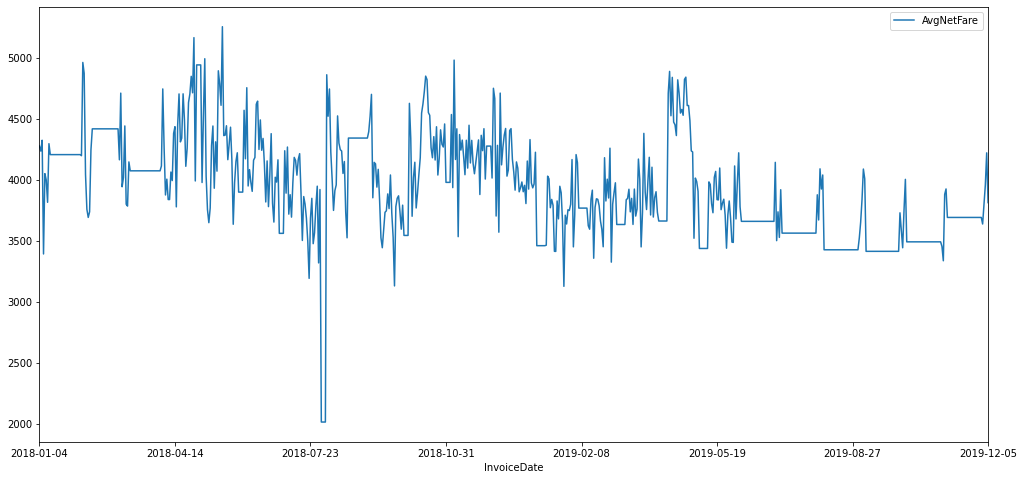

In [32]:
size=(17, 8)
ax = data.plot(x='InvoiceDate',y='AvgNetFare',figsize=size)

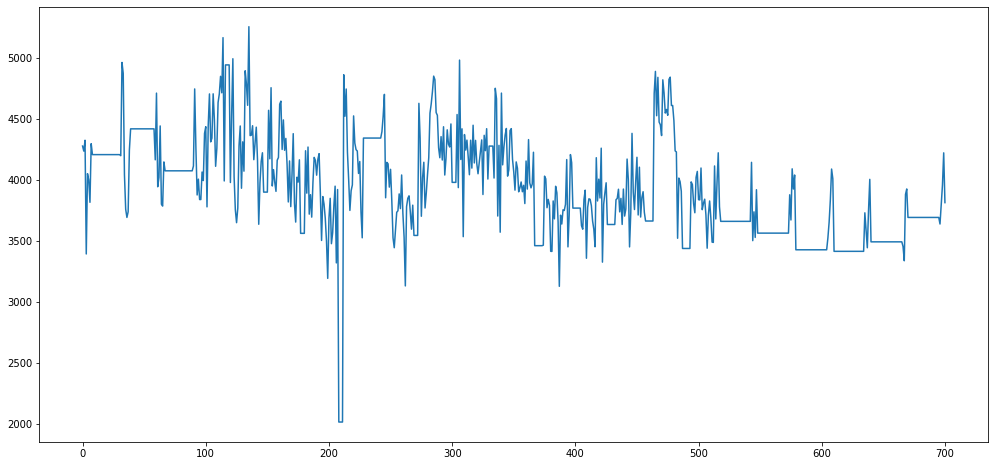

In [29]:
#Plotting AvgNetFare
plt.figure(figsize=(17, 8))
plt.plot(data.AvgNetFare)
plt.grid(False)
plt.show()

Clearly, you see that this is not a stationary process, and it is hard to tell if there is some kind of seasonality.

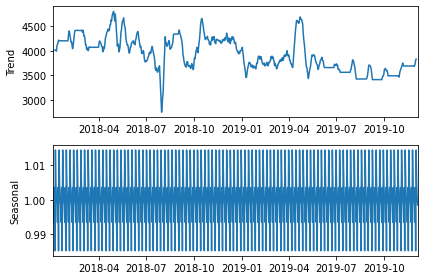

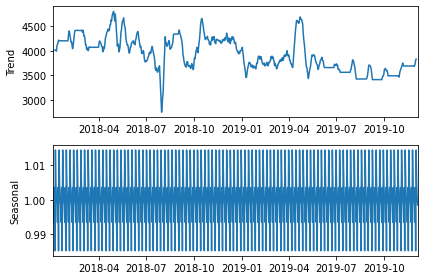

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_ETS = pd.read_csv('FinalDomesticDataset.csv',index_col ='InvoiceDate',parse_dates = True) 
df_ETS.head(5)
df_ETS=df_ETS.drop(['TotalNetFare'], axis = 1) 
result = seasonal_decompose(df_ETS,model ='multiplicative')

# ETS plot  
result.plot(observed=False,
    seasonal=True,
    trend=True,
    resid=False,
    weights=False) 

#ETS Decomposition
#ETS Decomposition is used to separate different components of a time series. 
#The term ETS stands for Error, Trend, and Seasonality.

As we can see here there is No perfect trend increase or decrease, and also we can observe there is mo seasonality.

Lets Try ADF (Augmented Dickey Fuller) Test

In [82]:
X = data["AvgNetFare"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is 'NOT' Stationary")
    print ("Accepting H1 - Time Series is 'Stationary'")
else:
    print ("Failed to Reject Ho - Time Series is Stationary")

ADF Statistic: -4.239188
p-value: 0.000565
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Reject Ho - Time Series is 'NOT' Stationary
Accepting H1 - Time Series is 'Stationary'


Test for stationarity: If the test statistic is less than the critical value, 
we can reject the null hypothesis (aka the series is stationary). 
When the test statistic is greater than the critical value, 
we fail to reject the null hypothesis (which means the series is not stationary). 


In our case ADF Statistic < Critical values >> Rejecting Null{NULL: Not Stationary}.

In [103]:
from statsmodels.tsa.stattools import kpss
def kpss_test(data, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(data)

KPSS Statistic: 1.8419603984293513
p-value: 0.01
num lags: 20
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary

In [33]:
data

,InvoiceDate,AvgNetFare
0,2018-01-04,4276
1,2018-01-05,4235
2,2018-01-06,4323
3,2018-01-07,3392
4,2018-01-08,4050
...,...,...
696,2019-12-01,3637
697,2019-12-02,3801
698,2019-12-03,3957
699,2019-12-04,4220


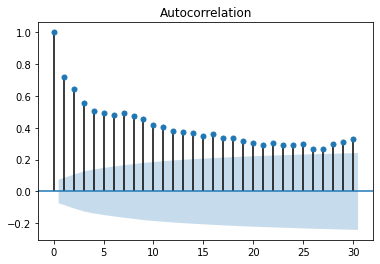

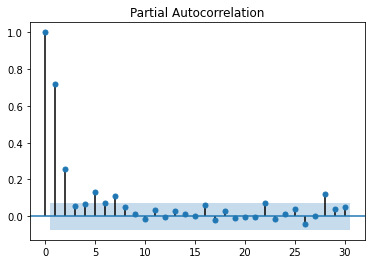

In [61]:
#Lets plot ACF and PACF.
plot_acf(data['AvgNetFare'],lags=30)
plot_pacf(data['AvgNetFare'],lags=30)
plt.show()

In [64]:
len(data)

701

In [63]:
len(data)-30

671

In [77]:
data.head(5)

,InvoiceDate,AvgNetFare
0,2018-01-04,4276
1,2018-01-05,4235
2,2018-01-06,4323
3,2018-01-07,3392
4,2018-01-08,4050


In [83]:
data.dtypes

InvoiceDate     object
AvgNetFare     float64
dtype: object

In [94]:
data.set_index('InvoiceDate',inplace=True)

In [87]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [95]:
len(data)-30

671

In [99]:
xTrain,xTest = data['AvgNetFare'][:671],data['AvgNetFare'][671:]

In [100]:
xTest

InvoiceDate
2019-11-06    3691
2019-11-07    3691
2019-11-08    3691
2019-11-09    3691
2019-11-10    3691
2019-11-11    3691
2019-11-12    3691
2019-11-13    3691
2019-11-14    3691
2019-11-15    3691
2019-11-16    3691
2019-11-17    3691
2019-11-18    3691
2019-11-19    3691
2019-11-20    3691
2019-11-21    3691
2019-11-22    3691
2019-11-23    3691
2019-11-24    3691
2019-11-25    3691
2019-11-26    3691
2019-11-27    3691
2019-11-28    3691
2019-11-29    3691
2019-11-30    3691
2019-12-01    3637
2019-12-02    3801
2019-12-03    3957
2019-12-04    4220
2019-12-05    3812
Name: AvgNetFare, dtype: int32

Lets use ARIMA:Non-seasonal Autoregressive Integrated Moving Averages

In [112]:
arima = ARIMA(xTrain,order=(2,0,1))
arima = arima.fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             AvgNetFare   No. Observations:                  671
Model:                     ARMA(2, 1)   Log Likelihood               -4736.142
Method:                       css-mle   S.D. of innovations            281.076
Date:                Fri, 10 Jul 2020   AIC                           9482.284
Time:                        17:31:26   BIC                           9504.828
Sample:                    01-04-2018   HQIC                          9491.016
                         - 11-05-2019                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3935.6106     91.534     42.996      0.000    3756.207    4115.014
ar.L1.AvgNetFare     1.3075      0.082     15.933      0.000       1.147       1.468
ar.L2.AvgNetFare    -0.3309      0.073     -4.553      0.000      -0.473      -0.188
ma.L1.AvgNetFare    -0.7961      0.064    -12.431      0.000      -0.922      -0.671
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0369           +0.0000j            1.0369            0.0000
AR.2            2.9146           +0.0000j            2.9146            0.0000
MA.1            1.2561           +0.0000j            1.2561            0.0000
-----------------------------------------------------------------------------
"""

In [113]:
pred = arima.forecast(steps=len(xTest))

print(mean_squared_error(xTest,pred[0]))
print(np.sqrt(mean_squared_error(xTest,pred[0])))

13206.268020528805
114.91852775131086


In [ ]:
#prediction

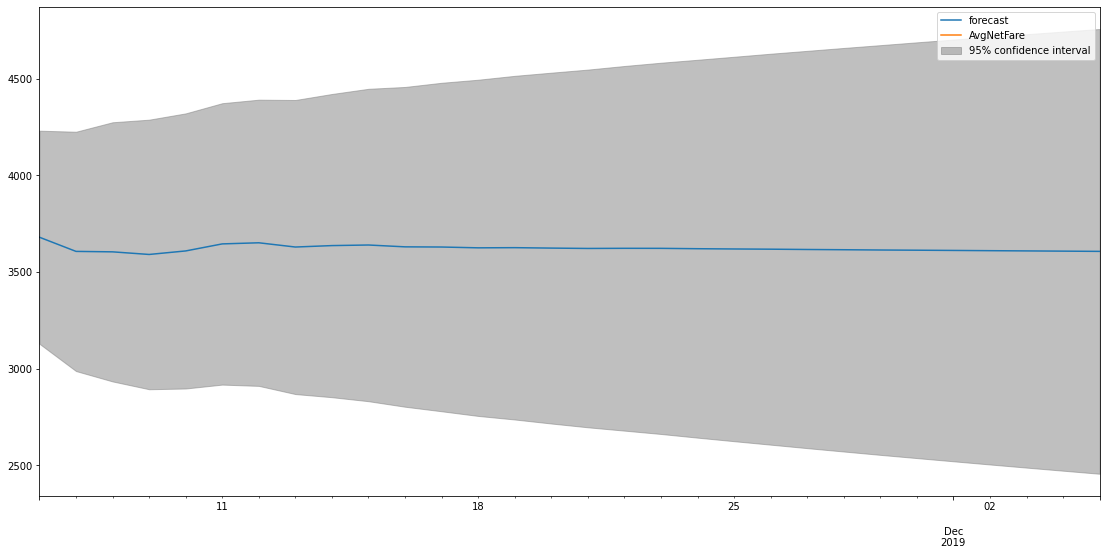

In [107]:
ax=arima.plot_predict(start='2019-11-06' , end='2019-12-05')
ax.set_figheight(9)
ax.set_figwidth(19)

In [65]:
# Import the library 
from pmdarima import auto_arima 

# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(data['AvgNetFare'], start_p = 1, start_q = 1, 
                        max_p = 3, max_q = 3, m = 12, 
                        start_P = 0, seasonal = True, 
                        d = None, D = 1, trace = True, 
                        error_action ='ignore', # we don't want to know if an order does not work 
                        suppress_warnings = True, # we don't want convergence warnings 
                        stepwise = True)       # set to stepwise

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=9781.384, BIC=9804.060, Time=4.876 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=10423.717, BIC=10432.788, Time=0.061 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=10023.057, BIC=10041.198, Time=2.056 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=9943.834, BIC=9961.975, Time=2.458 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=10421.822, BIC=10426.357, Time=0.042 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=10184.171, BIC=10202.312, Time=0.320 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=9783.376, BIC=9810.587, Time=6.743 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the

In [66]:
# To print the summary 
stepwise_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  701
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -4880.309
Date:                            Fri, 10 Jul 2020   AIC                           9772.618
Time:                                    14:35:31   BIC                           9799.830
Sample:                                         0   HQIC                          9783.145
                                            - 701                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0006      0.051     -0.011      0.991      -0.101       0.100
ar.L1          1.3981      0.037     38.250      0.000       1.326       1.470
ar.L2         -0.3982      0.035    -11.528      0.000      -0.466      -0.330
ma.L1         -0.8711      0.022    -38.986      0.000      -0.915      -0.827
ma.S.L12      -0.9959      0.209     -4.755      0.000      -1.406      -0.585
sigma2      7.732e+04   1.48e+04      5.237      0.000    4.84e+04    1.06e+05
===================================================================================
Ljung-Box (Q):                       55.17   Jarque-Bera (JB):              1648.03
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
# Split data into train / test sets 
train = data.iloc[:len(data)-30] 
test = data.iloc[len(data)-30:] # set (1 months) for testing 

# Fit a SARIMAX(2, 0, 1)x(0, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 

model = SARIMAX(train['AvgNetFare'], 
                order = (2, 0, 1), 
                seasonal_order =(0, 1, 1, 12)) 

result = model.fit()
result.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         AvgNetFare   No. Observations:                  671
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -4681.424
Date:                            Fri, 10 Jul 2020   AIC                           9372.848
Time:                                    14:35:58   BIC                           9395.302
Sample:                                         0   HQIC                          9381.552
                                            - 671                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3959      0.034     40.769      0.000       1.329       1.463
ar.L2         -0.3959      0.034    -11.648      0.000      -0.463      -0.329
ma.L1         -0.8730      0.017    -52.128      0.000      -0.906      -0.840
ma.S.L12      -0.9996      0.034    -29.835      0.000      -1.065      -0.934
sigma2      8.026e+04   4.66e-07   1.72e+11      0.000    8.03e+04    8.03e+04
===================================================================================
Ljung-Box (Q):                       53.84   Jarque-Bera (JB):              1399.79
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.77e+25. Standard errors may be unstable.
"""

In [74]:
pred = result.forecast(steps=len(test))
print(mean_squared_error(test['AvgNetFare'],pred))
a=30129.511025777196
print(np.sqrt(a))

30129.511025777196
173.5785442552656
